# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score


In [2]:
df_org=pd.read_csv('C:\\Users\\Gaurav Yadav\\Documents\\kaggle datasets\\classification/BREAST CANCER.CSV')
df=df_org.copy()
df.head()



id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df1=df.drop(['Unnamed: 32','id'],axis=1)
df1.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

# Encoding categorical variable,splitting of data and feature scaling

In [8]:
y=df1.iloc[:,0].values
y=LabelEncoder().fit_transform(y)
sc_x=StandardScaler()
x=df1.iloc[:,1:].values
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.2,random_state=0)
x_tr=sc_x.fit_transform(x_tr)
x_te=sc_x.transform(x_te)


# Model building

In [9]:
log=LogisticRegression()
log.fit(x_tr,y_tr)
y_pr=log.predict(x_te)
print(classification_report(y_te,y_pr))
print(confusion_matrix(y_te,y_pr))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[65  2]
 [ 2 45]]


Text(0, 0.5, 'True Positive Rate')

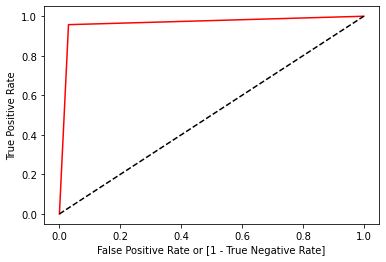

In [10]:
fpr, tpr, thresholds = roc_curve(y_te,y_pr)

auc = roc_auc_score(y_te, y_pr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [14]:
rf=RandomForestClassifier(n_estimators=500,random_state=0)
rf.fit(x_tr,y_tr)
y_pr=rf.predict(x_te)
print(classification_report(y_te,y_pr))
print(confusion_matrix(y_te,y_pr))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[65  2]
 [ 1 46]]


Text(0, 0.5, 'True Positive Rate')

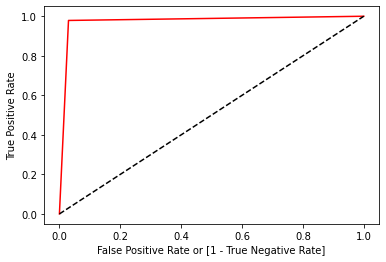

In [15]:
fpr, tpr, thresholds = roc_curve(y_te,y_pr)

auc = roc_auc_score(y_te, y_pr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# even though accuracy of both the models is same ,but we will go for Random forest model because it only predicts 1 malignant as beignin,            as we it is safe if we predict benign as malignant but vice versa is highly dangerous

# from scatter plot of a mean of a measure and worst of a measure it is evident that both are highly correlated so dropping either one of them while building model

In [6]:
z=df1.columns

In [9]:
#list of columns with 'worst' in them
l=[]
for i in z:
    if 'worst' in i:
        l.append(i)

        

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [10]:
#dropping the correlated columns
df1=df1.drop(columns=l)
df1

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_se  texture_se  perimeter_se  area_se  \
0           0.2419  ...     1.0950      0.9053         8.589   153.40   
1           0.1812  ...     0.5435      0.7339         3.398    74.08   
2           0.2069  ...     0.7456      0.7869         4.585    94.03   
3           0.2597  ...     0.4956      1.1560         3.445    27.23   
4           0.1809  ...     0.7572      0.7813         5.438    94.44   
..             ...  ...        ...         ...           ...      ...   
564         0.1726  ...     1.1760      1.2560         7.673   158.70   
565         0.1752  ...     0.7655      2.4630         5.203    99.04   
566         0.1590  ...     0.4564      1.0750         3.425    48.55   
567         0.2397  ...     0.7260      1.5950         5.772    86.22   
568         0.1587  ...     0.3857      1.4280         2.548    19.15   

     smoothness_se  compactness_se  concavity_se  concave points_se  \
0         0.006399         0.04904       0.05373            0.01587   
1         0.005225         0.01308       0.01860            0.01340   
2         0.006150         0.04006       0.03832            0.02058   
3         0.009110         0.07458       0.05661            0.01867   
4         0.011490         0.02461       0.05688            0.01885   
..             ...             ...           ...                ...   
564       0.010300         0.02891       0.05198            0.02454   
565       0.005769         0.02423       0.03950            0.01678   
566       0.005903         0.03731       0.04730            0.01557   
567       0.006522         0.06158       0.07117            0.01664   
568       0.007189         0.00466       0.00000            0.00000   

     symmetry_se  fractal_dimension_se  
0        0.03003              0.006193  
1        0.01389              0.003532  
2        0.02250              0.004571  
3        0.05963              0.009208  
4        0.01756              0.005115  
..           ...                   ...  
564      0.01114              0.004239  
565      0.01898              0.002498  
566      0.01318              0.003892  
567      0.02324              0.006185  
568      0.02676     

In [16]:
y=df1.iloc[:,0].values
le=LabelEncoder()
y=le.fit_transform(y)
x=df1.iloc[:,1:].values
#splitting into training and test set
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.2,random_state=0)
sc=StandardScaler()
x_tr=sc.fit_transform(x_tr)
x_te=sc.transform(x_te)

# model training and results prediction

In [17]:
rf=RandomForestClassifier(n_estimators=500,random_state=0)
rf.fit(x_tr,y_tr)
y_pr=rf.predict(x_te)
print(classification_report(y_te,y_pr))
print(confusion_matrix(y_te,y_pr))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

[[63  4]
 [ 3 44]]


Text(0, 0.5, 'True Positive Rate')

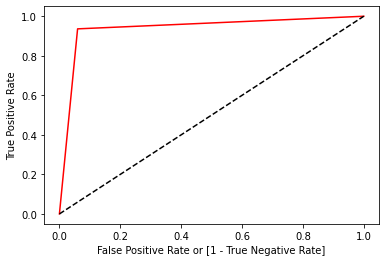

In [18]:
fpr, tpr, thresholds = roc_curve(y_te,y_pr)

auc = roc_auc_score(y_te, y_pr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# there is slight reduction in accuracy as compared to model when we considered all the columns for training the model,but drop is negligable.

# Model Validation 

In [19]:
from sklearn.model_selection import KFold,cross_val_score

In [23]:
kfold=KFold(n_splits=2,random_state=0)
x=sc.fit_transform(x)
score=cross_val_score(rf,x,y,cv=kfold)
score.mean()

0.9192055843834939

In [24]:

'''as mean accuracy of our model with different subsets of our data is quite consistent and close to our model's accuracy
with training set so our model is good'''

"as mean accuracy of our model with different subsets of our data is quite consistent and close to our model's accuracy\nwith training set so our model is good"